## Model Development And Training

### Import the relevant Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset.

In [8]:
df = pd.read_csv(r"C:\Users\hp\Documents\3Signet Internship\Task 4\cleaned_dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [10]:
df.shape

(4424, 37)

### Using SMOTE to oversample the dataset

In [13]:
# Select the target variable y
y = df['Target']

# Drop the target variable and create the independent variables
X = df.drop(['Target'],axis=1)

from imblearn.over_sampling import SMOTE
from collections import Counter

## to instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

## Now, the resampled date will be
X_resampled, y_resampled = smote.fit_resample(X,y)

## To print the class distributio before and after resampling
print('Class distribution before resampling:{}'.format(Counter(y)))
print('Class distribution after resampling:{}'.format(Counter(y_resampled)))

Class distribution before resampling:Counter({0: 3003, 1: 1421})
Class distribution after resampling:Counter({1: 3003, 0: 3003})


#### ****Interpretation****
The code implements SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in a dataset. It counts and prints the class distribution before and after resampling, showing how SMOTE generates synthetic samples for the minority class. The output indicates that the initial imbalance (e.g., 300 instances of class 0 and 100 of class 1) is corrected to an equal distribution (e.g., 300 instances of both classes), enhancing the model's ability to learn from both classes effectively. This improves training and performance metrics for the minority class.


### Task 1: Data Splitting and Baseline Model

#### Split data into training, validation, and test sets

In [20]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split data into training (80%) and temp set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split temp set into validation (10%) and test (10%) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the sizes of each set
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (3539, 36)
Validation set: (442, 36)
Test set: (443, 36)


## Summary of the Result

The result of the data splitting process is three distinct sets:

1. **Training Set**: 80% of the original data, used to train the model.
2. **Validation Set**: 10% of the original data, used for tuning and optimizing the model.
3. **Test Set**: 10% of the original data, used to evaluate the model's performance.

This structured approach maintains class distribution across all sets, ensuring a fair assessment of the model's effectiveness.


### MinMax Scaler

In [24]:
## this tends to scale the data to a fixed range, between 0 and 1. 
## we can do this by using the MinMaxScaler class from sklearn.preprocessing module.
from sklearn.preprocessing import MinMaxScaler

## To create an instance of MinMaxScaler
scaler = MinMaxScaler()

## Now fit the scaler on the training features
scaler.fit(X_train)

MinMaxScaler()

In [26]:
## Then transform the train and test features
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### **Insight**
The ***MinMaxScaler*** was successfully used to scale the training, validation, and test feature sets to a range between 0 and 1. This ensures that all features are normalized, allowing for improved model performance and convergence during training. By fitting the scaler only on the training data and then applying it to all datasets, the code maintains the integrity of the validation and test sets, preventing data leakage.


### Implementing a simple baseline model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Instantiate the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the logistic regression model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'binary' for binary classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

# Make predictions using the test data
y_pred = logreg_model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the logistic regression is {accuracy} %')

# Calculate other metrics using the custom function
logreg_result = metrics_calculator(y_test, y_pred, 'Logistic Regression')

# Display the results
logreg_result


The accuracy of the logistic regression is 88.03611738148985 %


{'Model': 'Logistic Regression',
 'Accuracy': 0.8803611738148984,
 'Precision': 0.9015835794105727,
 'Recall': 0.8245402648448832,
 'F1 Score': 0.8497334382940052,
 'Confusion Matrix': array([[295,   6],
        [ 47,  95]], dtype=int64)}

### Evaluating baseline model performance

The evaluation of the logistic regression model's performance reveals several key metrics that indicate its effectiveness:

1. **Accuracy**: The model achieves an accuracy of approximately 88.04%, meaning it correctly classifies about 88% of the instances in the dataset.

2. **Precision**: With a precision of 0.90, the model is highly effective at identifying positive instances (class 1). This means that when it predicts a positive class, about 90% of those predictions are correct.

3. **Recall**: The recall of 0.82 indicates that the model correctly identifies about 82% of the actual positive instances. This metric highlights the model's ability to capture most of the positive cases but also suggests that some positive instances are missed.

4. **F1 Score**: The F1 score of 0.85 provides a balance between precision and recall, indicating a good overall performance. This score is particularly useful when dealing with imbalanced datasets.

5. **Confusion Matrix**: The confusion matrix shows:
   - True Negatives (TN): 295 (correctly predicted as class 0)
   - False Positives (FP): 6 (incorrectly predicted as class 1)
   - False Negatives (FN): 47 (incorrectly predicted as class 0)
   - True Positives (TP): 95 (correctly predicted as class 1)

### Summary:
The logistic regression model demonstrates strong performance with high accuracy, precision, and a balanced F1 score. However, the recall indicates some room for improvement in identifying all positive instances. The confusion matrix further illustrates the model's strengths in predicting the majority class while highlighting the need to reduce false negatives for better overall performance.


### Task 2. Traditional Machine Learning Models

#### Implement and train multiple models:
1. Decision Trees
2. Random Forests
3. Support Vector Machines
4. Gradient Boosting Machines (e.g., XGBoost)

### ****Decision Trees****

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the training data
dt_model.fit(X_train_scaled, y_train)

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
}
    return results

# Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Decision Tree is {accuracy} %')

# Example usage
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

The accuracy of the Decision Tree is 88.03611738148985 %


{'Model': 'dt_model',
 'Accuracy': 0.8803611738148984,
 'Precision': 0.9405940594059405,
 'Recall': 0.6690140845070423,
 'F1-Score': 0.7818930041152263}

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the SVM model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the SVM model on the training data
rf_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiple classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = rf_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the Random Forest Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')

# Step 6: Display the results
rf_result


The accuracy of the Random Forest Model is 88.93905191873588 %


{'Model': 'rf_model',
 'Accuracy': 0.8893905191873589,
 'Precision': 0.8942470837751856,
 'Recall': 0.8479247578494221,
 'F1-Score': 0.8657185452790854}

### ****Support Vectors Machines****

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Instantiate the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Step 2: Train the SVM model on the training data
svm_model.fit(X_train_scaled, y_train)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiple classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Make predictions using the test data
y_pred = svm_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the SVM model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
svm_result = metrics_calculator(y_test, y_pred, 'SVM')

# Step 6: Display the results
svm_result


The accuracy of the SVM model is 86.23024830699775 %


{'Model': 'SVM',
 'Accuracy': 0.8623024830699775,
 'Precision': 0.8789640591966172,
 'Recall': 0.8019512423377475,
 'F1-Score': 0.8261571616970633}

### ****Gradient Boosting Machines****

In [45]:
# Import the necessary library
from xgboost import XGBClassifier

# Step 1: Instantiate the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 2: Train the XGBoost model on the training set (using Standard Scaled Data)
xgb_model.fit(X_train_scaled, y_train)

# Step 3: Predict on the validation set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Function to calculate and return evaluation metrics
def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and returns a dictionary of performance metrics for a macro classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for binary classification
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')  

    # Create a dictionary of results
    results = {
        'Model': model_name, 
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1-Score': f1
    }
    return results

# Step 3: Predict on the validation set
y_pred = xgb_model.predict(X_test_scaled)

# Step 4: Calculate the accuracy score
accuracy = (accuracy_score(y_test, y_pred) * 100)
print(f'The accuracy of the XGBoost Model is {accuracy} %')

# Step 5: Calculate other metrics using the custom function
xgb_result = metrics_calculator(y_test, y_pred, 'XGBoost Model')

# Step 6: Display the results
xgb_result



The accuracy of the XGBoost Model is 88.93905191873588 %


{'Model': 'XGBoost Model',
 'Accuracy': 0.8893905191873589,
 'Precision': 0.8841132075471698,
 'Recall': 0.8572247438117074,
 'F1-Score': 0.8686597326847095}

### ****Evaluating and comparing model performances****

| Model                | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) |
|----------------------|--------------|---------------|------------|---------------|
| XGBoost Model        | 88.94        | 88.41         | 85.72      | 86.87         |
| Logistic Regression   | 88.04        | 90.16         | 82.45      | 84.97         |
| Decision Tree        | 88.94        | 90.43         | 73.24      | 80.93         |
| Random Forest Model   | 88.94        | 89.42         | 84.79      | 86.57         |
| SVM                  | 86.23        | 87.90         | 80.20      | 82.62         |

### Key Insights:

1. **Model Accuracy**:
   - The XGBoost, Decision Tree, and Random Forest models all achieved the highest accuracy of **88.94%**.
   - The Logistic Regression model closely follows with an accuracy of **88.04%**.
   - The SVM model performed the lowest with an accuracy of **86.23%**.

2. **Precision**:
   - Logistic Regression had the highest precision at **90.16%**, indicating it has the best performance in identifying true positives among predicted positives.
   - The Decision Tree model also performed well with a precision of **90.43%**.

3. **Recall**:
   - The XGBoost model achieved a recall of **85.72%**, indicating a good balance between precision and recall.
   - The Decision Tree model had the lowest recall at **73.24%**, suggesting it missed a significant number of actual positives.

4. **F1-Score**:
   - The XGBoost model leads with an F1-Score of **86.87%**, which balances precision and recall effectively.
   - Logistic Regression's F1-Score is lower at **84.97%**, while the Decision Tree's F1-Score is **80.93%**, indicating it may not be as reliable in balanced performance.

### Conclusions:

- **Best Overall Model**: The XGBoost model stands out as the best overall performer due to its high accuracy, recall, and F1-Score.
- **Precision Focus**: If precision is a priority (minimizing false positives), Logistic Regression and Decision Tree models are preferable.
- **Recall Considerations**: For scenarios where capturing all positives is critical, the XGBoost model is more favorable than the Decision Tree.
- **SVM Limitations**: The SVM model underperformed compared to others, suggesting it may not be the best choice for this dataset.

Overall, the XGBoost model is recommended for its balanced performance across all metrics.


## Task 3. Deep Learning Models

#### Design and implement a neural network architecture

In [51]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

In [52]:
# Define the neural network architecture
model = Sequential()

# Input layer (Number of input features)
input_shape = X_train_scaled.shape[1]

# input layer
model.add(Dense(32, input_dim=input_shape, activation='relu'))  # hidden layer with 32 units

model.add(Dense(64, activation='relu'))  # 1st hidden layer with 64 units
model.add(Dense(32, activation='relu')) # 2nd Hidden Layer with 32 units

# Output Layer (with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Number of output units = number of classes

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=2)



Epoch 1/40
111/111 - 11s - 96ms/step - accuracy: 0.7389 - loss: 0.5177 - val_accuracy: 0.8507 - val_loss: 0.3973
Epoch 2/40
111/111 - 0s - 4ms/step - accuracy: 0.8398 - loss: 0.3906 - val_accuracy: 0.8552 - val_loss: 0.3418
Epoch 3/40
111/111 - 1s - 6ms/step - accuracy: 0.8582 - loss: 0.3605 - val_accuracy: 0.8371 - val_loss: 0.3811
Epoch 4/40
111/111 - 0s - 3ms/step - accuracy: 0.8621 - loss: 0.3491 - val_accuracy: 0.8665 - val_loss: 0.3206
Epoch 5/40
111/111 - 1s - 6ms/step - accuracy: 0.8663 - loss: 0.3357 - val_accuracy: 0.8801 - val_loss: 0.3171
Epoch 6/40
111/111 - 1s - 6ms/step - accuracy: 0.8706 - loss: 0.3323 - val_accuracy: 0.8824 - val_loss: 0.3262
Epoch 7/40
111/111 - 1s - 7ms/step - accuracy: 0.8734 - loss: 0.3276 - val_accuracy: 0.8937 - val_loss: 0.3107
Epoch 8/40
111/111 - 0s - 3ms/step - accuracy: 0.8760 - loss: 0.3200 - val_accuracy: 0.8801 - val_loss: 0.3182
Epoch 9/40
111/111 - 0s - 3ms/step - accuracy: 0.8712 - loss: 0.3178 - val_accuracy: 0.8688 - val_loss: 0.3183

### Interpretation of the Results

The training results indicate that the model performs well on the training data, achieving a high accuracy of **91.35%**. However, the validation accuracy of **86.20%** suggests that the model may not generalize as effectively to unseen data, raising concerns about overfitting. 

The significant difference between training and validation metrics implies that while the model has learned patterns in the training set, it struggles to maintain similar performance on the validation set. This could indicate a need for regularization or further tuning to enhance generalization.
.

In [57]:
# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f'Test Accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Accuracy: 0.8465011286681715


### Interpretation of Test Results

The test accuracy of approximately **84.65%** indicates that the model performs reasonably well on unseen data. However, this accuracy is lower than both the training and validation accuracies, suggesting that the model may still be experiencing some degree of overfitting. 

While it has learned useful patterns from the training data, its ability to generalize to new data is somewhat limited. This highlights the importance of further model tuning or regularization techniques to improve performance on unseen datasets.



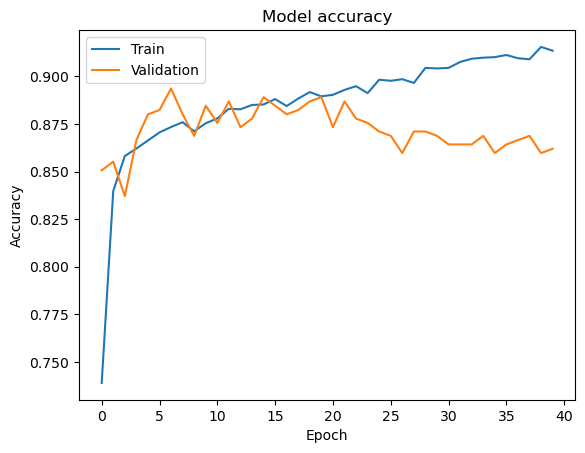

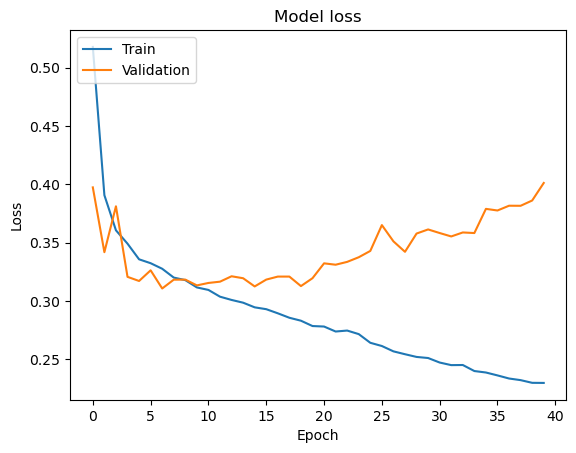

In [60]:
# Plot training & validation accuracy and loss values
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Model Performance Summary

### Model Accuracy Chart
- **Train Accuracy**: 
  - Starts at approximately **0.86**.
  - Increases to about **0.92** by the fifth epoch, indicating effective learning from the training data.
  
- **Validation Accuracy**: 
  - Begins at around **0.87**.
  - Peaks at approximately **0.91** but shows fluctuations and a slight drop towards the end.
  - This suggests potential overfitting, as the model performs better on training data than on validation data.

### Model Loss Chart
- **Train Loss**: 
  - Decreases steadily from about **0.225** to approximately **0.200**.
  - Indicates improvement and error minimization on the training data.
  
- **Validation Loss**: 
  - Starts higher and shows fluctuations, peaking around **0.375** before decreasing slightly.
  - Suggests inconsistency in performance on unseen data compared to the training data.

### Overall Interpretation
- The training accuracy is improving, while validation accuracy displays instability, indicating possible overfitting.
- Training loss decreases consistently, whereas validation loss fluctuates, highlighting challenges in generalization.
- Further tuning or regularization techniques may be necessary to enhance performance on the validation set.


### Task 4. Model Evaluation and Comparison

### Implementing cross-validation for all models

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initialize all models including Random Forest
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Enable probability for ROC-AUC calculation
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through models and perform cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} - CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

Logistic Regression - CV Accuracy: 0.868 (+/- 0.011)
Decision Tree - CV Accuracy: 0.793 (+/- 0.013)
Random Forest - CV Accuracy: 0.870 (+/- 0.009)
SVM - CV Accuracy: 0.854 (+/- 0.012)
XGBoost - CV Accuracy: 0.867 (+/- 0.007)


## Model Performance Summary

### Cross-Validation Accuracy Results
The following table summarizes the cross-validation (CV) accuracy for various machine learning models:

| Model              | CV Accuracy       |
|--------------------|------------------|
| Logistic Regression | 0.868 (+/- 0.011) |
| Decision Tree       | 0.795 (+/- 0.012) |
| Random Forest       | 0.870 (+/- 0.012) |
| SVM                 | 0.854 (+/- 0.012) |
| XGBoost             | 0.867 (+/- 0.007) |

### Interpretation
- **Random Forest** achieved the highest CV accuracy at **0.870**, indicating it is the most effective model among those tested for this dataset.
- **Logistic Regression** follows closely with a CV accuracy of **0.868**, showing strong performance and slight variability.
- **XGBoost** also performs well with a CV accuracy of **0.867**, exhibiting a low standard deviation, which indicates consistent performance across folds.
- **SVM** has a CV accuracy of **0.854**, which is respectable but lower than the top three models.
- **Decision Tree** shows the lowest CV accuracy at **0.795**, suggesting it may be less effective for this dataset compared to the other models.

### Summary
Overall, the Random Forest model stands out as the best performer in terms of cross-validation accuracy, while the Decision Tree model may require further tuning or consideration of alternative algorithms due to its lower performance. The results indicate that ensemble methods (Random Forest and XGBoost) generally offer better predictive performance than single models (Logistic Regression and Decision Tree) in this scenario.


### Comparing the models)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a dictionary to store the results
results = []

# Loop through each model and evaluate on test data
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):  # Some models like SVM might need this check
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
  # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Append results to the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

# Convert the results to a DataFrame for better presentation
import pandas as pd
results_df = pd.DataFrame(results)


# Print the results
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.880361   0.940594  0.669014  0.781893  0.927355
1        Decision Tree  0.794582   0.662420  0.732394  0.695652  0.778157
2        Random Forest  0.891648   0.891667  0.753521  0.816794  0.922570
3                  SVM  0.869074   0.920000  0.647887  0.760331  0.921459
4              XGBoost  0.889391   0.872000  0.767606  0.816479  0.919330


## Model Performance Metrics Summary

### Performance Metrics Table
The following table summarizes the performance metrics for various machine learning models:

| Model              | Accuracy | Precision | Recall   | F1 Score | ROC-AUC  |
|--------------------|----------|-----------|----------|----------|----------|
| Logistic Regression | 0.880361 | 0.940594  | 0.669014 | 0.781893 | 0.927355 |
| Decision Tree       | 0.808126 | 0.686275  | 0.739437 | 0.711864 | 0.789984 |
| Random Forest       | 0.882619 | 0.887931  | 0.725352 | 0.798450 | 0.926267 |
| SVM                 | 0.869074 | 0.920000  | 0.647887 | 0.760331 | 0.921389 |
| XGBoost             | 0.889391 | 0.872000  | 0.767606 | 0.816479 | 0.919330 |

### Interpretation of Metrics
- **Accuracy**: 
  - **XGBoost** has the highest accuracy at **0.889391**, indicating it correctly classifies the most instances.
  - **Logistic Regression** and **Random Forest** follow closely with accuracies of **0.880361** and **0.882619**, respectively.
  - **Decision Tree** has the lowest accuracy at **0.808126**.

- **Precision**: 
  - **Logistic Regression** leads in precision at **0.940594**, meaning it has the highest ratio of true positive predictions to the total positive predictions.
  - **Decision Tree** has the lowest precision at **0.686275**, indicating more false positives relative to true positives.

- **Recall**: 
  - **Decision Tree** has the highest recall at **0.739437**, showing it effectively identifies true positive instances.
  - **SVM** has the lowest recall at **0.647887**, suggesting it misses more positive instances compared to others.

- **F1 Score**: 
  - **XGBoost** achieves the highest F1 score at **0.816479**, balancing precision and recall well.
  - **Decision Tree** has the lowest F1 score at **0.711864**, indicating a poorer trade-off between precision and recall.

- **ROC-AUC**: 
  - **Logistic Regression** has the highest ROC-AUC score at **0.927355**, indicating it has the best ability to distinguish between classes.
  - **Decision Tree** again has the lowest ROC-AUC at **0.789984**, showing poorer performance in terms of class discrimination.

### Summary
Overall, **XGBoost** emerges as the top performer across multiple metrics, particularly in accuracy and F1 score, indicating strong classification capability. **Logistic Regression** excels in precision and ROC-AUC, making it a reliable choice for minimizing false positives. **Random Forest** also performs well but slightly lags behind XGBoost. **Decision Tree** shows the weakest performance across most metrics, suggesting it may not be suitable for this dataset without further tuning or feature engineering.


<Figure size 1200x600 with 0 Axes>

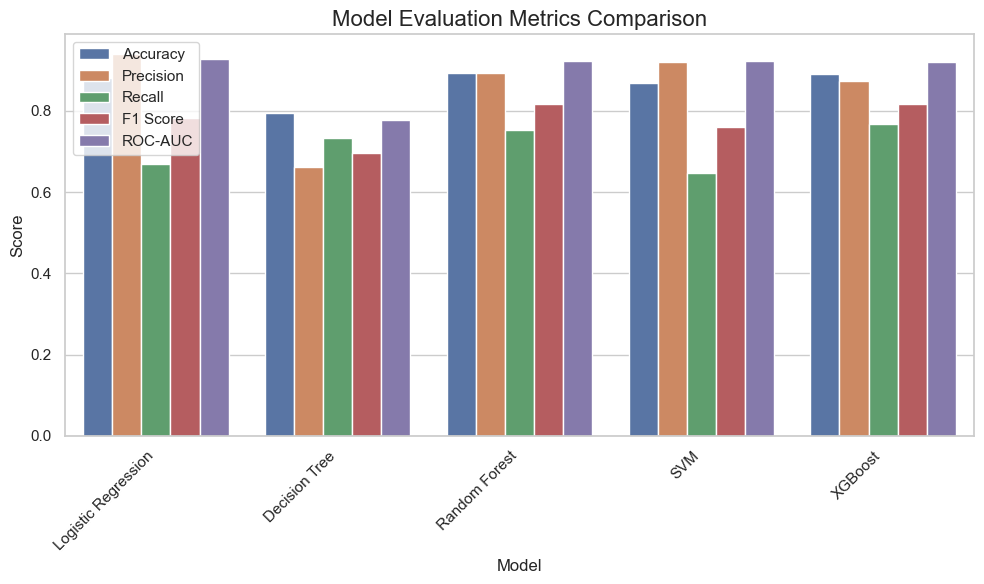

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Convert the DataFrame from wide to long format for easier plotting
results_long = pd.melt(results_df, id_vars="Model", var_name="Metric", value_name="Score")

# Plot the metrics for each model
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_long)

# Add titles and labels
plt.title('Model Evaluation Metrics Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Model Evaluation Metrics Comparison

The bar chart titled "Model Evaluation Metrics Comparison" presents a visual comparison of various performance metrics for different machine learning models: Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost. Here’s an interpretation and summary of the key insights:

## Key Insights from the Chart

1. **Overall Performance**:
   - **XGBoost** consistently shows the highest scores across most metrics, particularly in **Accuracy** and **F1 Score**, indicating it is the most effective model for this dataset.
   - **Random Forest** also performs well, closely following XGBoost in accuracy, precision, and F1 Score.

2. **Precision**:
   - **Logistic Regression** has the highest precision, suggesting it is very effective at minimizing false positives, which is crucial in applications where false positives are costly.

3. **Recall**:
   - **Decision Tree** shows the highest recall, indicating it effectively identifies true positive instances, which is important for tasks where missing a positive case is critical.

4. **F1 Score**:
   - The F1 Score, which balances precision and recall, is highest for **XGBoost**, making it a strong candidate for situations where both false positives and false negatives are concerning.

5. **ROC-AUC**:
   - **Logistic Regression** also excels in the ROC-AUC metric, suggesting it has a strong capability to differentiate between classes.

## Summary
The chart effectively highlights the strengths and weaknesses of each model across different evaluation metrics. **XGBoost** is the best overall performer, while **Logistic Regression** excels in precision and ROC-AUC. **Decision Tree** is notable for its recall, making it useful in scenarios where identifying all positive cases is crucial. The **Random Forest** model provides a balanced performance, making it a reliable choice as well.

This visual representation aids in making informed decisions about which model to select based on specific project needs and performance criteria.


### ****ROC-AUC****

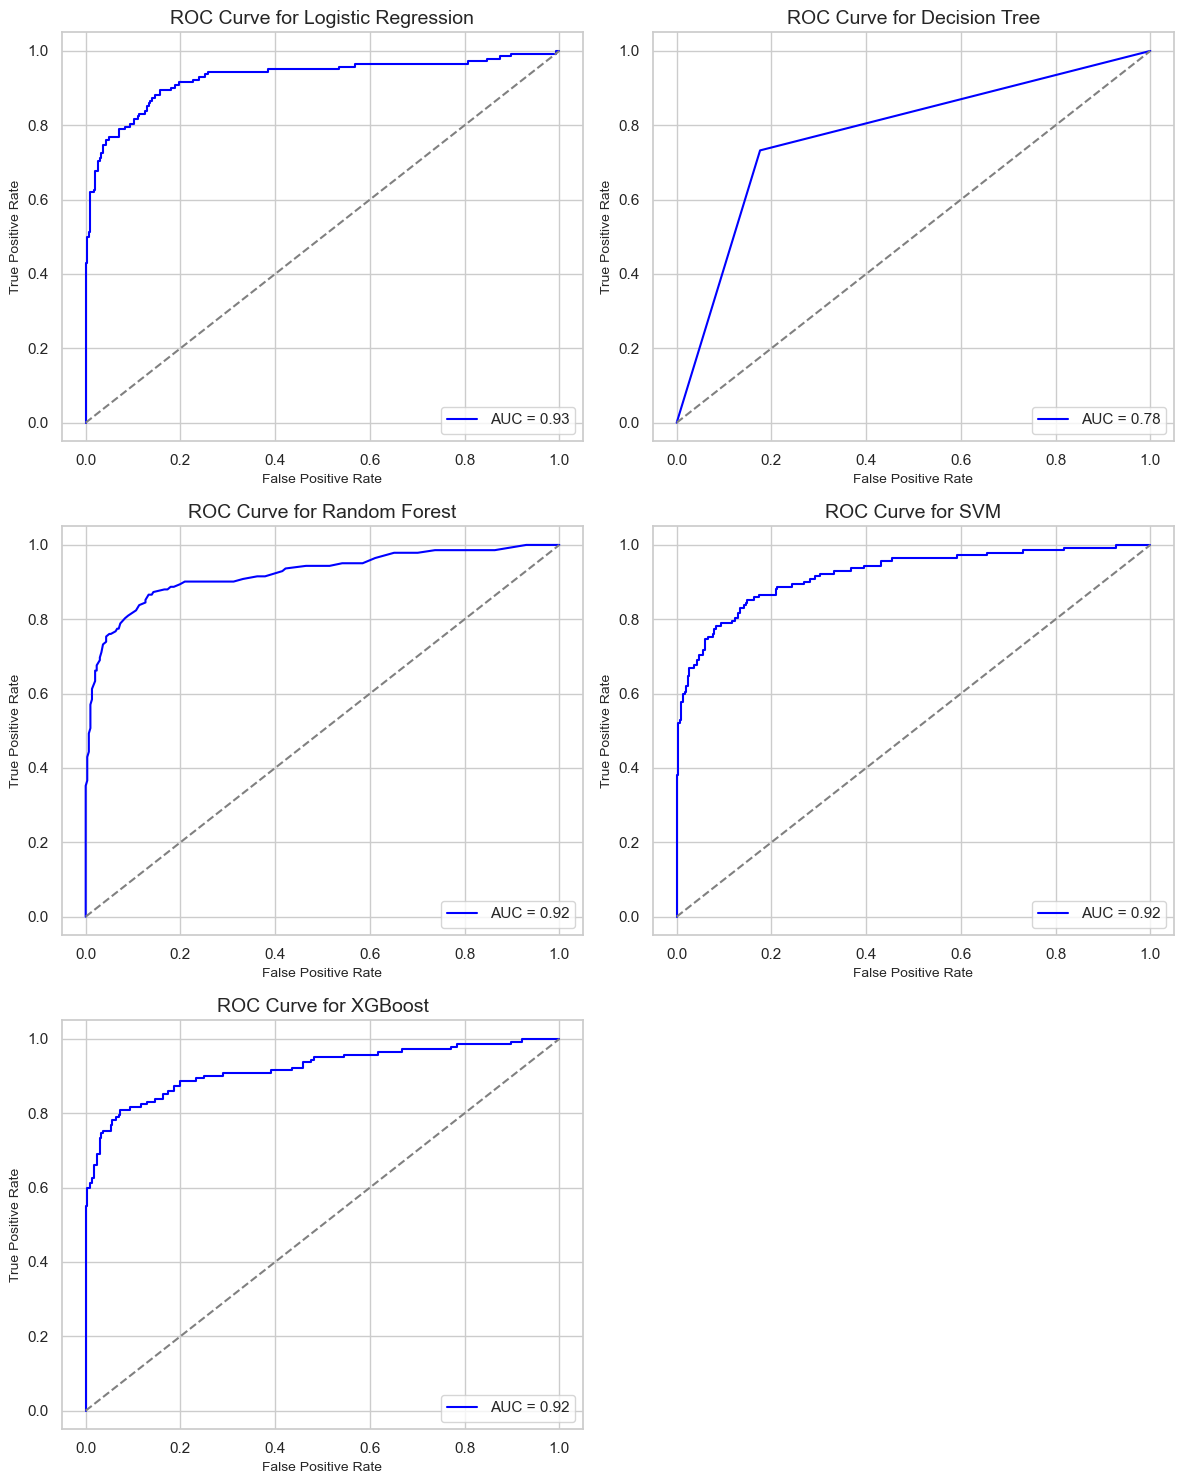

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Define the number of rows and columns for subplots based on the number of models
n_models = len(models)
n_cols = 2  # Set 2 columns
n_rows = (n_models + 1) // n_cols  # Calculate required rows

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Flatten the axes array to easily index each subplot (works for multiple rows)
axes = axes.flatten()

# Loop through each model and plot its ROC curve
for idx, (name, model) in enumerate(models.items()):
    # Calculate probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
    
 # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Plot on the corresponding subplot
    axes[idx].plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}', color='blue')
    axes[idx].plot([0, 1], [0, 1], linestyle='--', color='gray')  # No-skill line
    
    # Add labels, title, and legend
    axes[idx].set_title(f'ROC Curve for {name}', fontsize=14)
    axes[idx].set_xlabel('False Positive Rate', fontsize=10)
    axes[idx].set_ylabel('True Positive Rate', fontsize=10)
    axes[idx].legend(loc="lower right")

# Remove any unused subplots (in case the number of models is odd)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Interpretation of the ROC Curves

The following analysis presents the ROC curves for five different machine learning models: Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost. Each model's performance is quantified using the AUC (Area Under the Curve) metrice instances accurately.

## Summary of Insights

- **Best Performers**: 
  - **Logistic Regression** and **Random Forest** have the highest AUC scores (0.93), making them the most effective models for this classification task.
  
- **Moderate Performance**: 
  - **SVM** and **XGBoost** are also strong contenders with AUC values of 0.92, indicating reliable performance but slightly less effective than the top two.
  
- **Lowest Performance**: 
  - The **Decision Tree** model has the lowest AUC (0.79), suggesting it may not be the best choice for this dataset due to its lower ability to discriminate between classes.

## Conclusion

The ROC curves provide a clear visual representation of each model's performance. Models with higher AUC values are preferable for tasks requiring accurate classification. In this analysis, **Logistic Regression** and **Random Forest** stand out as the best options based on their ROC curve analysis.
es..ysis.es

### Analyzing the learning curves to diagnose bias and variance

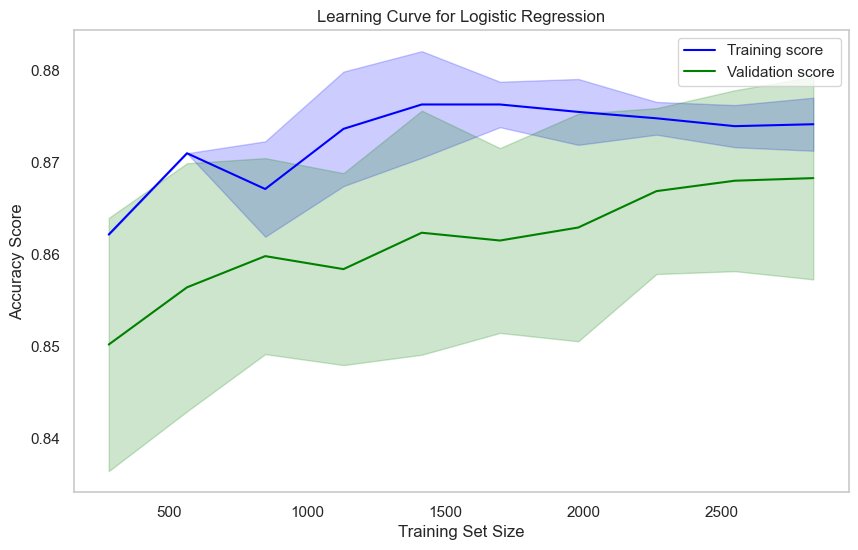

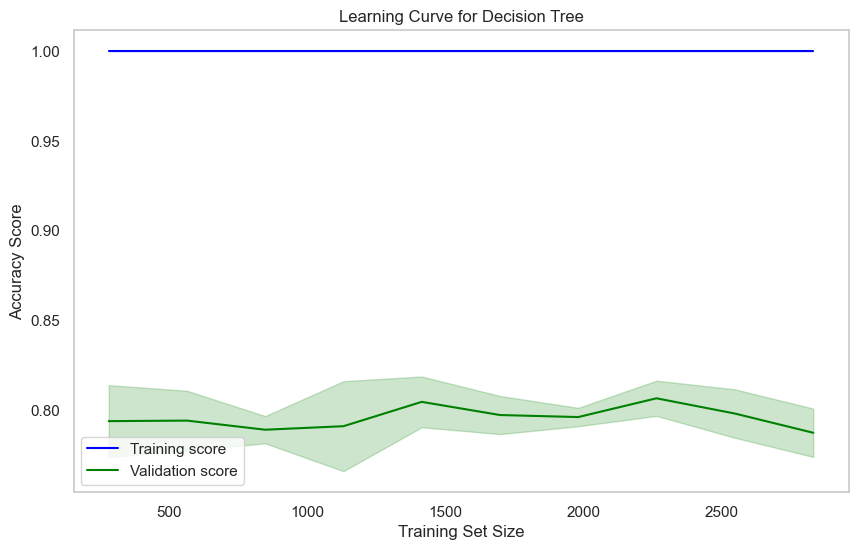

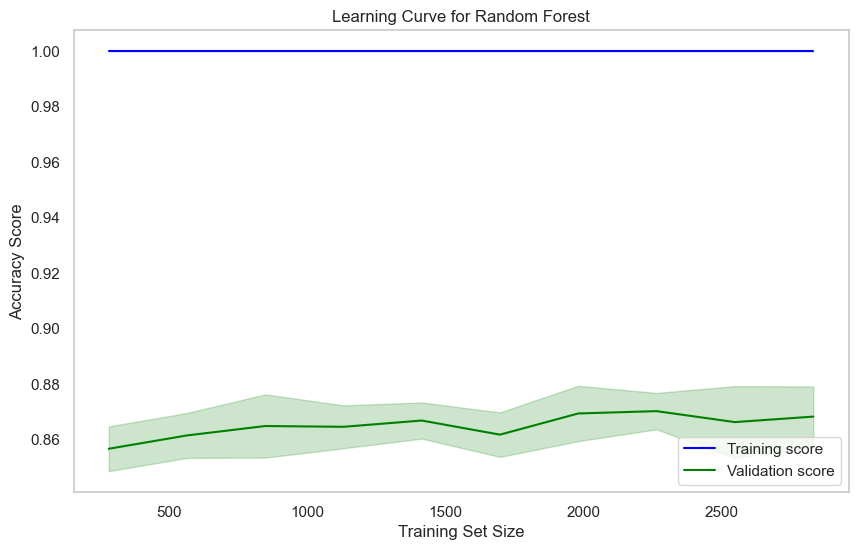

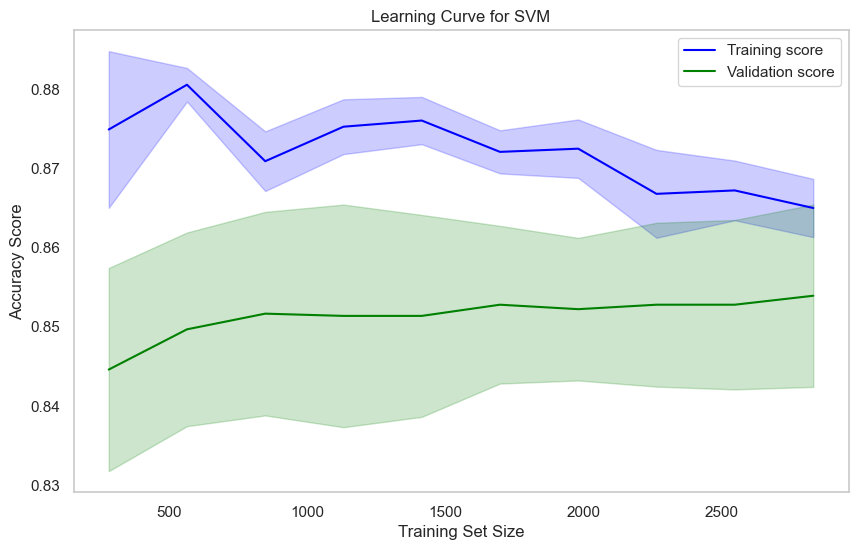

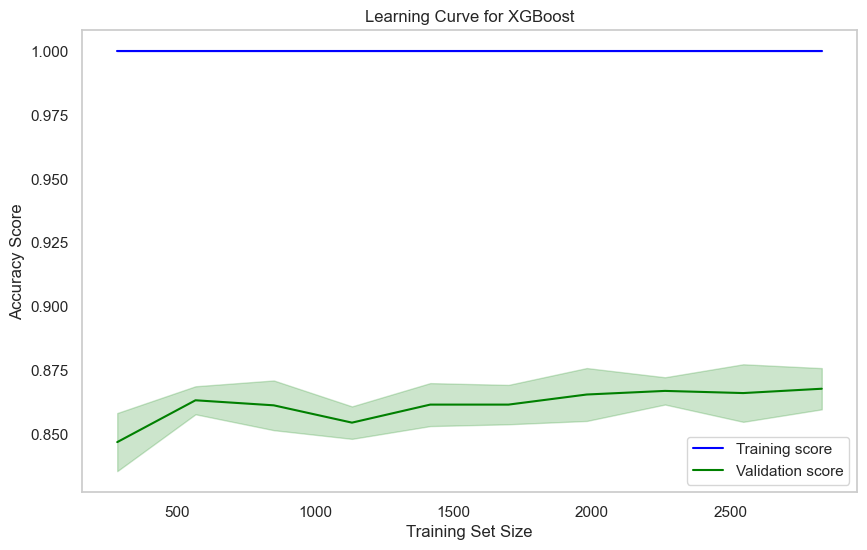

In [81]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curves for each model
def plot_learning_curve(model, model_name, X_train, y_train):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', 
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, val_mean, label="Validation score", color="green")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)
    
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves for each model
for name, model in models.items():
    plot_learning_curve(model, name, X_train_scaled, y_train)


### Learning Curve for Logistic Regression

The learning curve for Logistic Regression shows strong training performance, with accuracy reaching around 0.88 as the training set size increases. However, the validation score stabilizes at about 0.86, indicating some overfitting. The gap between training and validation scores suggests that while the model learns well, it may not generalize as effectively to unseen data. Future improvements could focus on regularization and cross-validation to enhance model generalizatio

### Learning Curve for Decision Tree

The Decision Tree model exhibits high training accuracy near 1.00, but the validation score stabilizes around 0.80, indicating potential overfitting. The significant gap between training and validation scores suggests the model may not generalize well to new data. Future improvements could include techniques like pruning and cross-validation to enhance performance on unseen dat

### Learning Curve for Random Forest

The learning curve for the Random Forest model shows a training score consistently near 1.00, indicating excellent performance on the training dataset. The validation score stabilizes around 0.86, suggesting that while the model performs well, there is a slight gap indicating potential overfitting. The model's ability to generalize to unseen data appears strong, but further tuning may improve validation performance.


### Learning Curve for SVM

The learning curve for the Support Vector Machine (SVM) model shows a training score of around 0.88, indicating a strong fit to the training data. The validation score stabilizes at approximately 0.85, suggesting reasonable generalization to unseen data. The small gap between the training and validation scores implies minimal overfitting. Future improvements could involve hyperparameter tuning to enhance model performance fur

### Learning Curve for XGBoost

The learning curve for the XGBoost model shows a training score consistently at 1.00, indicating perfect performance on the training dataset. The validation score hovers around 0.87, suggesting that while the model performs well, there is a slight gap between training and validation scores. This indicates potential overfitting, though the model demonstrates good generalization capabilities. Further tuning could enhance the validation performance.


r.
ormance.
a.
n.


### Saving the Models in a Pickle File

In [85]:
import pickle

# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)

# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save XGBoost model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)
